<a href="https://colab.research.google.com/github/Haikoo96/aiffel_quest2RE/blob/main/DL_lms/%EB%A1%9C%EC%9D%B4%ED%84%B0%EA%B8%B0%EC%82%AC%EC%98%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요 모듈 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.utils import to_categorical
from keras.datasets import reuters

In [ ]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                  test_size=0.25,
                                                  random_state=123)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [ ]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results


x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_test = to_categorical(test_labels, num_classes=46)
y_val = to_categorical(val_labels, num_classes=46)
y_train = to_categorical(train_labels, num_classes=46)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(6736, 46)
(2246, 46)
(2246, 46)
(6736, 10000)
(2246, 10000)
(2246, 10000)


In [ ]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.save('reutor_model.h1')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [ ]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('reutor_model.h1',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=8,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/15
211/211 [==============================] - 6s 19ms/step - loss: 2.5220 - accuracy: 0.4476 - val_loss: 1.6611 - val_accuracy: 0.6541
Epoch 2/15
211/211 [==============================] - 4s 19ms/step - loss: 1.5892 - accuracy: 0.6473 - val_loss: 1.3398 - val_accuracy: 0.6955
Epoch 3/15
211/211 [==============================] - 4s 20ms/step - loss: 1.3921 - accuracy: 0.6753 - val_loss: 1.2806 - val_accuracy: 0.7075
Epoch 4/15
211/211 [==============================] - 4s 19ms/step - loss: 1.2524 - accuracy: 0.7025 - val_loss: 1.2050 - val_accuracy: 0.7213
Epoch 5/15
211/211 [==============================] - 4s 17ms/step - loss: 1.1444 - accuracy: 0.7224 - val_loss: 1.1573 - val_accuracy: 0.7342
Epoch 6/15
211/211 [==============================] - 5s 23ms/step - loss: 1.0766 - accuracy: 0.7392 - val_loss: 1.1262 - val_accuracy: 0.7395
Epoch 7/15
211/211 [==============================] - 4s 17ms/step - loss: 1.0221 - accuracy: 0.7481 - val_loss: 1.1068 - val_accuracy: 0.7435

<ipython-input-19-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


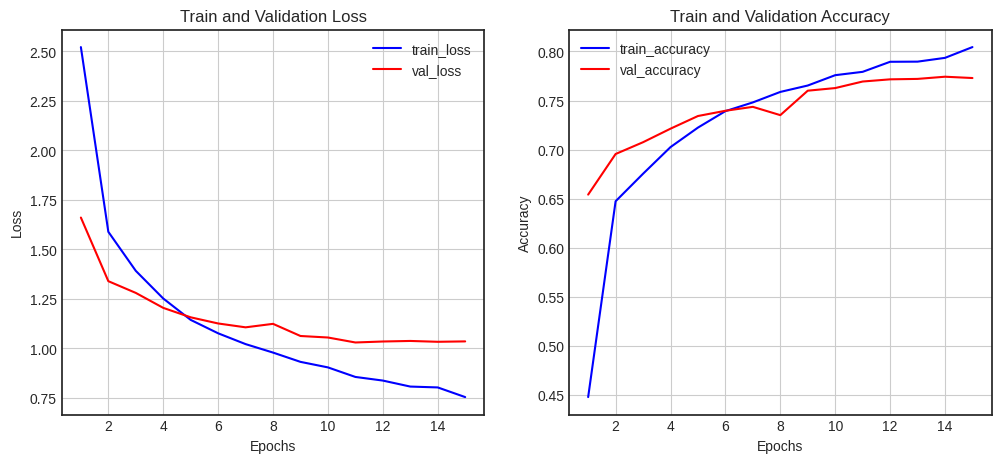

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.0321 - accuracy: 0.7765


[1.032065749168396, 0.7764915227890015]